In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

# Read the csv file using genfromtxt
dataset2 = "Data/combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education.csv"
dataset2_extract = np.genfromtxt(dataset2, dtype = ['i4', 'U80', 'U80', 'U80', 'f8'], delimiter = ',', names = True)
print(dataset2_extract)

[(1990, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVELS', 'MF',  79.8)
 (1990, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVELS', 'M',  81. )
 (1990, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVELS', 'F',  78.4)
 (1990, 'GROSS ENROLMENT RATIO', 'PRIMARY EDUCATION', 'MF', 102.5)
 (1990, 'GROSS ENROLMENT RATIO', 'PRIMARY EDUCATION', 'M', 103.6)
 (1990, 'GROSS ENROLMENT RATIO', 'PRIMARY EDUCATION', 'F', 101.2)
 (1990, 'GROSS ENROLMENT RATIO', 'SECONDARY EDUCATION', 'MF',  95.1)
 (1990, 'GROSS ENROLMENT RATIO', 'SECONDARY EDUCATION', 'M',  93.4)
 (1990, 'GROSS ENROLMENT RATIO', 'SECONDARY EDUCATION', 'F',  96.8)
 (1990, 'GROSS ENROLMENT RATIO', 'TERTIARY EDUCATION', 'MF',  23.5)
 (1990, 'GROSS ENROLMENT RATIO', 'TERTIARY EDUCATION', 'M',  26.4)
 (1990, 'GROSS ENROLMENT RATIO', 'TERTIARY EDUCATION', 'F',  20.4)
 (1991, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVELS', 'MF',  79.8)
 (1991, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVELS', 'M',  81.1)
 (1991, 'COMBINED GROSS ENROLMENT RATIO', 'ALL LEVEL

In [2]:
# Text-Based Analysis
print("**Combined and Gross Enrolment Ratios for Primary, Secondary and Tertiary Institutions**")

years = np.unique(dataset2_extract['year'])
category = np.unique(dataset2_extract['category'])
level_of_education = np.unique(dataset2_extract['level_of_education'])
sex = np.unique(dataset2_extract['sex'])
gross_enrolment_ratio = np.unique(dataset2_extract['gross_enrolment_ratio'])
columnHeaders = dataset2_extract.dtype.names

print(f"\nThere are {len(dataset2_extract)} rows and {len(dataset2_extract[1])} columns in the data file {dataset2}")
print(f"\nThere are {years.size} years of data, from {years[0]} to {years[-1]}\n")

# Checking numeric and non-numeric fields
print("The names of the columns are:")
for i in range(len(columnHeaders)-1):
    print(f"- {columnHeaders[i]} {type(dataset2_extract[0][i])} isNumeric: {str(dataset2_extract[0][i]).isnumeric()}")

# Checking numeric or non-numeric field for float values (gross enrolment ratio)
grossEnrolmentNumericCheck = dataset2_extract['gross_enrolment_ratio']
numericCheck = False
for i in grossEnrolmentNumericCheck:
    if np.isnan(i) == False:
        numericCheck = True
        
print(f"- {columnHeaders[4]} {type(dataset2_extract[0][4])} isNumeric: {numericCheck}")

print(f"\n{len(years)} unique values in years column\n{len(category)} unique values in category column\n{len(level_of_education)} unique values in level_of_education column\n{len(sex)} unique values in sex column\n{len(gross_enrolment_ratio)} unique values in gross_enrolment_ratio column")

# Maximum average enrolment ratio for each of the institutions and the year (MF)

# Primary Education
primary_education = dataset2_extract[np.isin(dataset2_extract['level_of_education'],['PRIMARY EDUCATION'])]
enrolment_avg_primary = primary_education[np.isin(primary_education['sex'],['MF'])]
highest_enrolment = enrolment_avg_primary['gross_enrolment_ratio'].max()
highest_enrolment_index = enrolment_avg_primary['gross_enrolment_ratio'].argmax()
year_primary = enrolment_avg_primary[highest_enrolment_index]['year']
print(f"\nYear with the highest average gross enrolment ratio for Primary Education: {year_primary}\nHighest gross enrolment ratio: {highest_enrolment}")

# Secondary Education
secondary_education = dataset2_extract[np.isin(dataset2_extract['level_of_education'],['SECONDARY EDUCATION'])]
enrolment_avg_secondary = secondary_education[np.isin(secondary_education['sex'],['MF'])]
highest_enrolment = enrolment_avg_secondary['gross_enrolment_ratio'].max()
highest_enrolment_index = enrolment_avg_secondary['gross_enrolment_ratio'].argmax()
year_secondary = enrolment_avg_secondary[highest_enrolment_index]['year']
print(f"\nYear with the highest average gross enrolment ratio for Secondary Education: {year_secondary}\nHighest gross enrolment ratio: {highest_enrolment}")

# Tertiary Education
tertiary_education = dataset2_extract[np.isin(dataset2_extract['level_of_education'],['TERTIARY EDUCATION'])]
enrolment_avg_tertiary = tertiary_education[np.isin(tertiary_education['sex'],['MF'])]
highest_enrolment = enrolment_avg_tertiary['gross_enrolment_ratio'].max()
highest_enrolment_index = enrolment_avg_tertiary['gross_enrolment_ratio'].argmax()
year_tertiary = enrolment_avg_tertiary[highest_enrolment_index]['year']
print(f"\nYear with the highest average gross enrolment ratio for Tertiary Education: {year_tertiary}\nHighest gross enrolment ratio: {highest_enrolment}")

**Combined and Gross Enrolment Ratios for Primary, Secondary and Tertiary Institutions**

There are 360 rows and 5 columns in the data file Data/combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education.csv

There are 30 years of data, from 1990 to 2019

The names of the columns are:
- year <class 'numpy.int32'> isNumeric: True
- category <class 'numpy.str_'> isNumeric: False
- level_of_education <class 'numpy.str_'> isNumeric: False
- sex <class 'numpy.str_'> isNumeric: False
- gross_enrolment_ratio <class 'numpy.float64'> isNumeric: True

30 unique values in years column
2 unique values in category column
4 unique values in level_of_education column
3 unique values in sex column
241 unique values in gross_enrolment_ratio column

Year with the highest average gross enrolment ratio for Primary Education: 1993
Highest gross enrolment ratio: 105.4

Year with the highest average gross enrolment ratio for Secondary Education: 2014
Highest gross enrolment ratio: 108.1

Yea

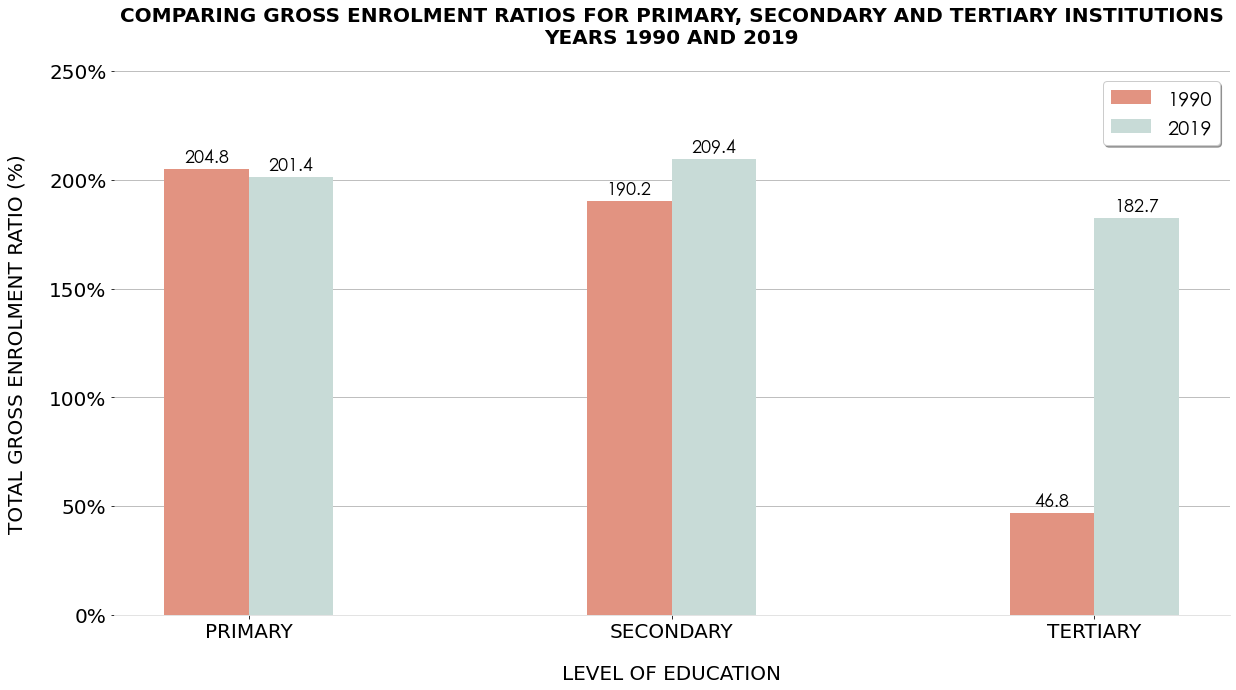

In [3]:
# Graph 1: Bar Chart - Gross Enrolment ratio by institution level

# Compare between 1990 and 2019
# Extract the years 1990 and 2019
data_1990 = dataset2_extract[dataset2_extract['year']==1990]
data_2019 = dataset2_extract[dataset2_extract['year']==2019]
# Extract the rows 1990 and 2019 for schools
data_schools1990 = data_1990[np.isin(data_1990['level_of_education'], ['PRIMARY EDUCATION', 'SECONDARY EDUCATION', 
                                                                       'TERTIARY EDUCATION'])]
data_schools2019 = data_2019[np.isin(data_2019['level_of_education'], ['PRIMARY EDUCATION', 'SECONDARY EDUCATION', 
                                                                       'TERTIARY EDUCATION'])]
# Extract the rows 1990 and 2019 based on gender
data_sex1990 = data_schools1990[np.isin(data_schools1990['sex'], ['M','F'])]
data_sex2019 = data_schools2019[np.isin(data_schools2019['sex'], ['M','F'])]

# Create the sum of gross enrolment ratios for both male and female per institution type
# FOR 1990
enrolmentratio_1990 = []
# Primary Schools
enrolmentratio_1990.append(data_sex1990[0][4] + data_sex1990[1][4])
# Secondary Schools
enrolmentratio_1990.append(data_sex1990[2][4] + data_sex1990[3][4])
# Tertiary Schools
enrolmentratio_1990.append(data_sex1990[4][4] + data_sex1990[5][4])

# FOR 2019
enrolmentratio_2019 = []
# Primary Schools
enrolmentratio_2019.append(data_sex2019[0][4] + data_sex2019[1][4])
# Secondary Schools
enrolmentratio_2019.append(data_sex2019[2][4] + data_sex2019[3][4])
# Tertiary Schools
enrolmentratio_2019.append(data_sex2019[4][4] + data_sex2019[5][4])

fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams['font.family'] = ['century gothic']

x_labels = ["PRIMARY", 'SECONDARY', 'TERTIARY']

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(symbol='%', is_latex=False))

bar1 = plt.bar(np.arange(3)-0.1,enrolmentratio_1990, label="1990",width=0.2, color='#E29381')
bar2 = plt.bar(np.arange(3)+0.1,enrolmentratio_2019, label="2019",width=0.2, color='#C8DBD7')
plt.title("COMPARING GROSS ENROLMENT RATIOS FOR PRIMARY, SECONDARY AND TERTIARY INSTITUTIONS\nYEARS 1990 AND 2019", 
          fontsize=20, y = 1.04, fontweight='bold')
plt.xlabel("LEVEL OF EDUCATION", fontsize=20, labelpad = 23)
plt.ylabel("TOTAL GROSS ENROLMENT RATIO (%)", fontsize=20, labelpad = 23)
plt.ylim(0,250)

# Formatting of the x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

ax.set_xticks(np.arange(3))
ax.set_xticklabels(x_labels, fontsize=20)
plt.yticks(fontsize=20)

ax.bar_label(bar1, padding = 3, fontsize=18)
ax.bar_label(bar2, padding = 3, fontsize=18)

legend = plt.legend(loc='upper right', shadow=True, fontsize=20)
plt.show()

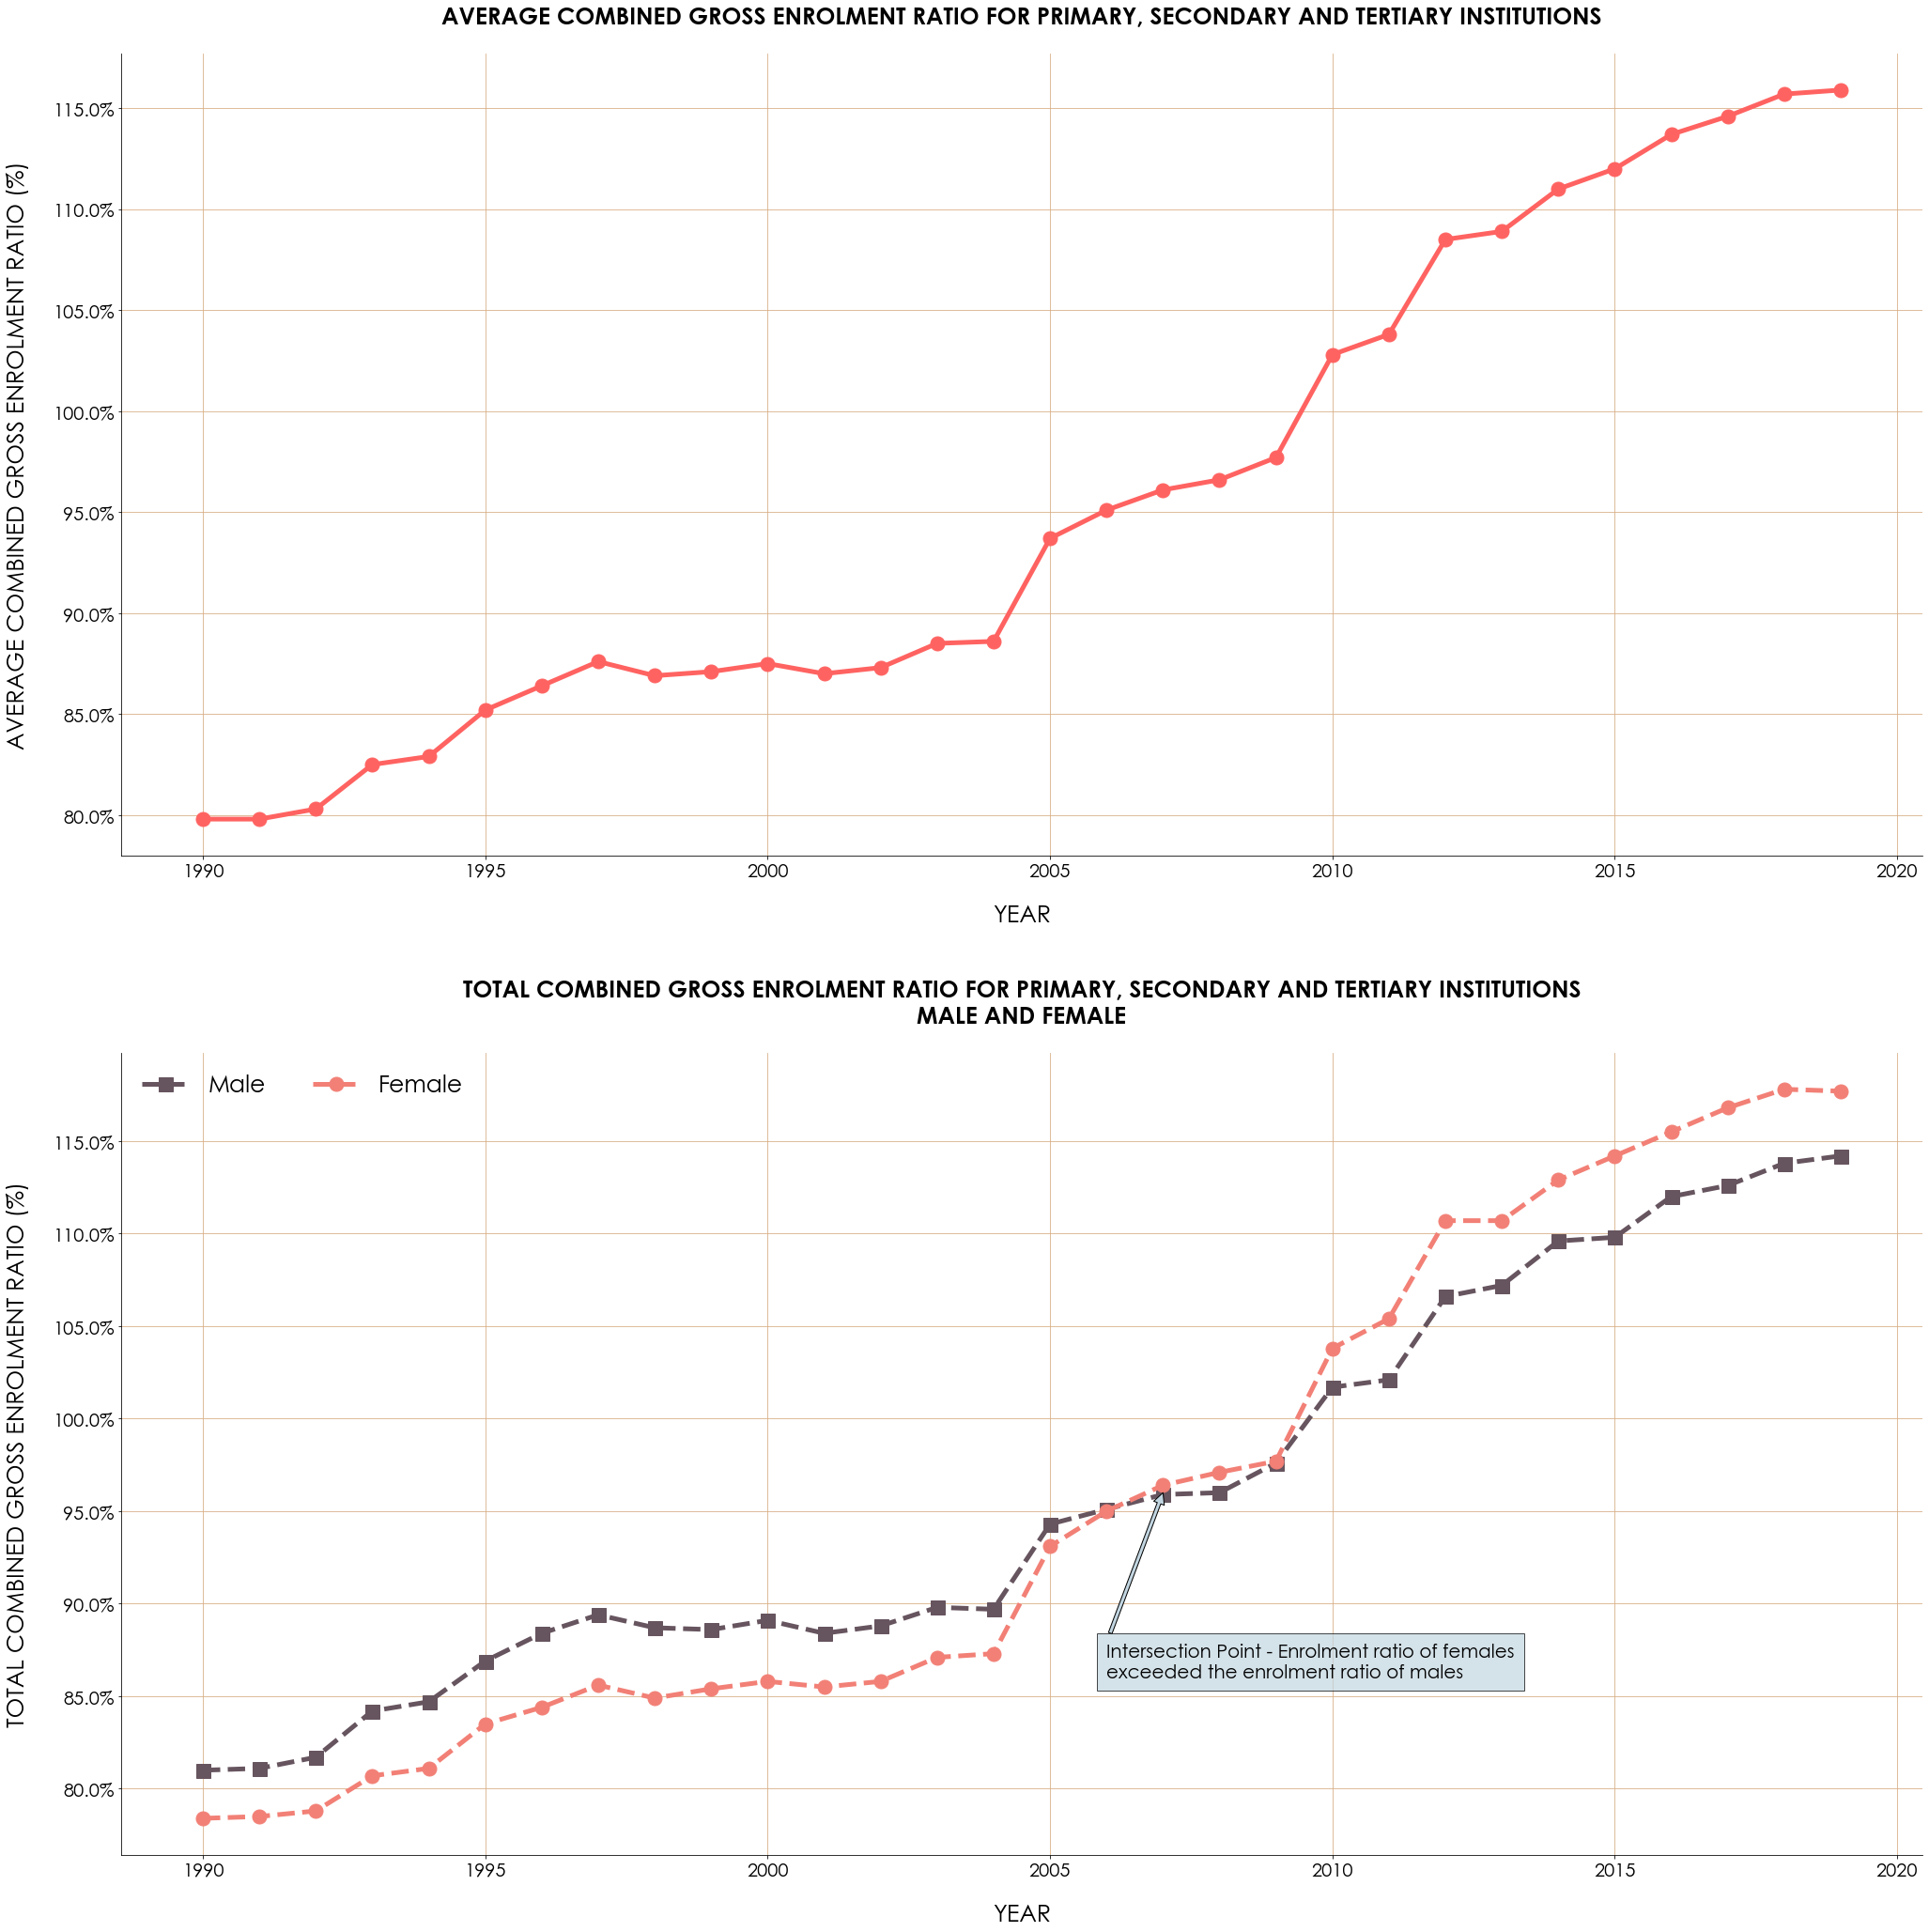

In [4]:
# Graph 2: Line Graph - Combined Gross Enrolment Ratio Per Year (Male & Female)
data_year = dataset2_extract[np.isin(dataset2_extract['year'],[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
                                                               2000, 2001,2002,2003,2004,2005,2006,2007,2008,2009,
                                                               2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])]

# Combined Gross Enrolment Ratio for All Levels for Males
data_sex_M = data_year[np.isin(data_year['sex'],['M'])]
data_combinedenrolment_M = data_sex_M[np.isin(data_sex_M['category'],['COMBINED GROSS ENROLMENT RATIO'])]
maleEnrolment = data_combinedenrolment_M['gross_enrolment_ratio']
yearOfEnrolment = data_combinedenrolment_M['year']

# Combined Gross Enrolment Ratio for All Levels for Females
data_sex_F = data_year[np.isin(data_year['sex'],['F'])]
data_combinedenrolment_F = data_sex_F[np.isin(data_sex_F['category'],['COMBINED GROSS ENROLMENT RATIO'])]
femaleEnrolment = data_combinedenrolment_F['gross_enrolment_ratio']
yearOfEnrolment = data_combinedenrolment_F['year']

# Average Combined Gross Enrolment Ratio for All Levels (MALE AND FEMALE)
data_sex_MF = data_year[np.isin(data_year['sex'],['MF'])]
data_avgenrolment = data_sex_MF[np.isin(data_sex_MF['category'],['COMBINED GROSS ENROLMENT RATIO'])]
avgEnrolment = data_avgenrolment['gross_enrolment_ratio']
yearofEnrolment = data_avgenrolment['year']


fig = plt.figure(figsize=(30,30))
# Figure 1
plt.rcParams.update({'font.size': 20})
ax = fig.add_subplot(211)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(symbol='%', is_latex=False))
ax.set_title("AVERAGE COMBINED GROSS ENROLMENT RATIO FOR PRIMARY, SECONDARY AND TERTIARY INSTITUTIONS", fontsize=25, y = 1.03, 
             fontweight='bold')
ax.set_xlabel("YEAR", fontsize=25, labelpad=25)
ax.set_ylabel("AVERAGE COMBINED GROSS ENROLMENT RATIO (%)", fontsize=25, labelpad=25)
ax.plot(yearofEnrolment, avgEnrolment, linewidth = 5, marker='o', markersize=15, c='#FF6361')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Figure 2
ax2 = fig.add_subplot(212)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(symbol='%', is_latex=False))
ax2.set_title("TOTAL COMBINED GROSS ENROLMENT RATIO FOR PRIMARY, SECONDARY AND TERTIARY INSTITUTIONS\nMALE AND FEMALE", fontsize=25, y = 1.03, fontweight='bold')
ax2.set_xlabel("YEAR", fontsize=25, labelpad=25)
ax2.set_ylabel("TOTAL COMBINED GROSS ENROLMENT RATIO (%)", fontsize=25, labelpad=25)
ax2.plot(yearOfEnrolment,maleEnrolment, label="Male", linewidth = 5, c="#66545E", linestyle='dashed', marker='s', markersize=15)
ax2.plot(yearOfEnrolment, femaleEnrolment, label="Female", linewidth = 5, c="#F28076", linestyle='dashed', marker='o', markersize=15)

# Setting grids for the line graphs
ax.yaxis.grid(True, c='#D7AD83')
ax.xaxis.grid(True, c='#D7AD83')
ax2.yaxis.grid(True, c='#D7AD83')
ax2.xaxis.grid(True,c='#D7AD83')

ax2.annotate('Intersection Point - Enrolment ratio of females\nexceeded the enrolment ratio of males', xy=(2007, 96), 
            xytext=(2006,86), arrowprops={'facecolor':'#C2D6E1'},bbox={'facecolor':'#C2D6E1', 'alpha':0.7, 'pad':10},fontsize=20)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
legend = plt.legend(fontsize=25, frameon=False, ncol=2)
fig.tight_layout(pad=3.0)
plt.rcParams['font.family'] = ['century gothic']
plt.show()